In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class NeuralNetwork:
  def __init__(self, learning_rate):
    self.weights = np.array([np.random.randn(), np.random.randn()])
    self.bias = np.random.randn()
    self.learning_rate = learning_rate

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def _sigmoid_deriv(self, x):
    return self._sigmoid(x) * (1 - self._sigmoid(x))

  def predict(self, input_vector):
    layer_1 = np.dot(input_vector, self.weights) + self.bias
    layer_2 = self._sigmoid(layer_1)
    return layer_2

  def _compute_gradients(self, input_vector, target):
    layer_1 = np.dot(input_vector, self.weights) + self.bias
    layer_2 = self._sigmoid(layer_1)
    prediction = layer_2

    derror_dprediction = 2 * (prediction - target)
    dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
    dlayer1_dbias = 1
    dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

    derror_dbias = (
        derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
    )
    derror_dweights = (
        derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
    )

    return derror_dbias, derror_dweights

  def _update_parameters(self, derror_dbias, derror_dweights):
    self.bias = self.bias - (derror_dbias * self.learning_rate)
    self.weights = self.weights - (
        derror_dweights * self.learning_rate
    )

  def train(self, input_vectors, targets, iterations):
    cumulative_errors = []
    for current_iteration in range(iterations):
      random_data_index = np.random.randint(len(input_vectors))
      input_vector = input_vectors[random_data_index]
      target = targets[random_data_index]

      derror_dbias, derror_dweights = self._compute_gradients(
          input_vector, target
      )

      self._update_parameters(derror_dbias, derror_dweights)

      if current_iteration % 100 == 0:
        cumulative_error = 0
        for data_instance_index in range(len(input_vectors)):
          data_point = input_vectors[data_instance_index]
          target = targets[data_instance_index]

          prediction = self.predict(data_point)
          error = np.square(prediction - target)

          cumulative_error = cumulative_error + error
        print("Iter: {}, Cul_err: {}".format(current_iteration, cumulative_error))
        cumulative_errors.append(cumulative_error)
    return cumulative_errors


Iter: 0, Cul_err: 3.9334348780959387
Iter: 100, Cul_err: 3.9320034770778283
Iter: 200, Cul_err: 3.9298169978926376
Iter: 300, Cul_err: 3.928100509967633
Iter: 400, Cul_err: 3.925428329145089
Iter: 500, Cul_err: 3.9235391917645814
Iter: 600, Cul_err: 3.9211409725102286
Iter: 700, Cul_err: 3.9194930115658684
Iter: 800, Cul_err: 3.9170657595675595
Iter: 900, Cul_err: 3.914399830280807
Iter: 1000, Cul_err: 3.9111960999735933
Iter: 1100, Cul_err: 3.909357713348309
Iter: 1200, Cul_err: 3.90648383870348
Iter: 1300, Cul_err: 3.902940219278257
Iter: 1400, Cul_err: 3.8994916528599424
Iter: 1500, Cul_err: 3.89595187350662
Iter: 1600, Cul_err: 3.890671554296333
Iter: 1700, Cul_err: 3.885477249226926
Iter: 1800, Cul_err: 3.879316681311826
Iter: 1900, Cul_err: 3.872954674409585
Iter: 2000, Cul_err: 3.864798792595492
Iter: 2100, Cul_err: 3.857976474913328
Iter: 2200, Cul_err: 3.845536717329612
Iter: 2300, Cul_err: 3.8349372622865174
Iter: 2400, Cul_err: 3.8243670120895796
Iter: 2500, Cul_err: 3.80583

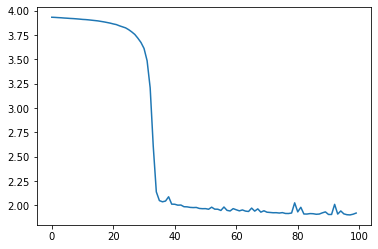

In [ ]:
input_vectors = np.array(
  [
    [3, 1.5],
    [2, 1],
    [4, 1.5],
    [3, 4],
    [3.5, 0.5],
    [2, 0.5],
    [5.5, 1],
    [1, 1],
  ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.01

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)


In [ ]:
y_hat

0.18945266922106135